### Parkinson's disease (PD), or simply Parkinson's

 It is a long-term degenerative disorder of the central nervous system that mainly affects the motor system. The symptoms usually emerge slowly and, as the disease worsens, non-motor symptoms become more common.




[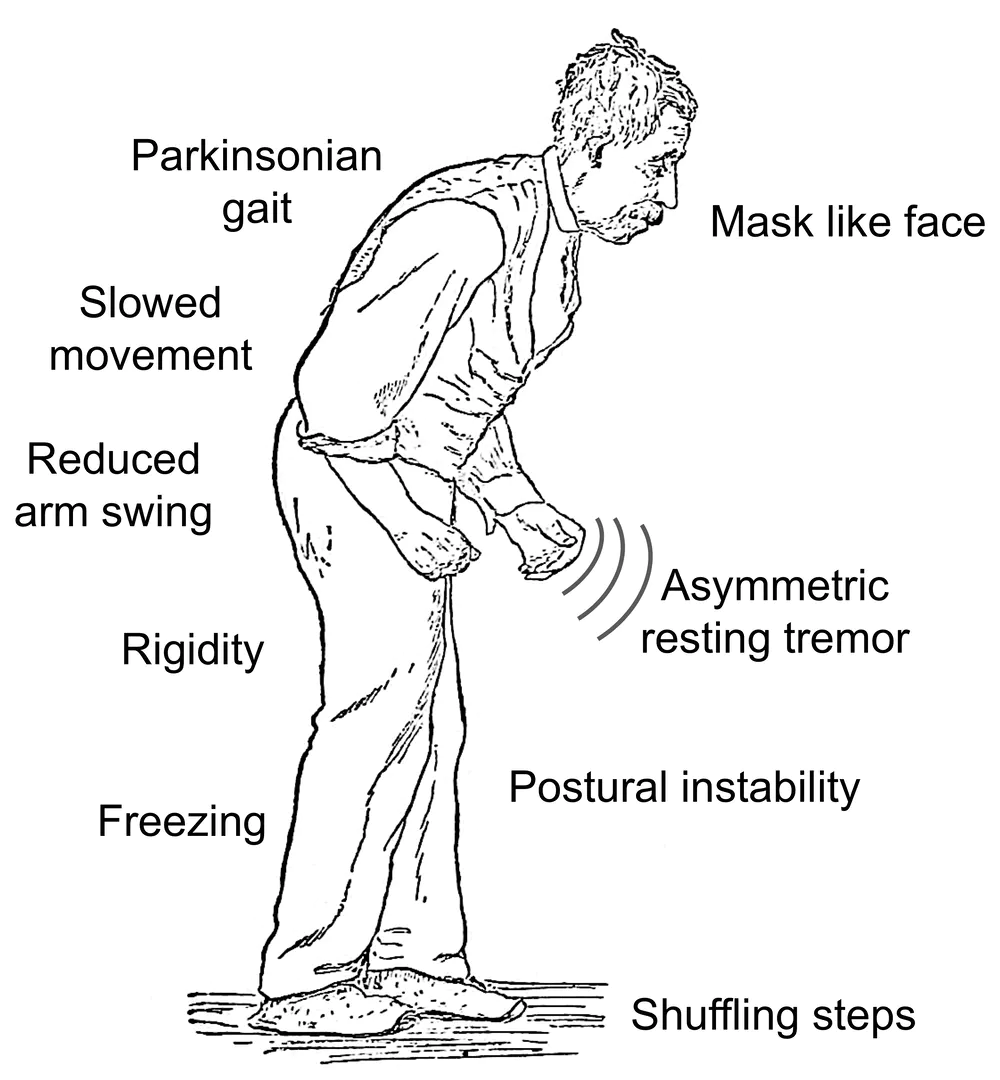](http://)

### Data Set Information:
This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD.

The data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to one voice recording. There are around six recordings per patient, the name of the patient is identified in the first column.For further information or to pass on comments, please contact Max Little (littlem '@' robots.ox.ac.uk).

Further details are contained in the following reference -- if you use this dataset, please cite:
Max A. Little, Patrick E. McSharry, Eric J. Hunter, Lorraine O. Ramig (2008), 'Suitability of dysphonia measurements for telemonitoring of Parkinson's disease', IEEE Transactions on Biomedical Engineering (to appear).

### Attribute Information:
Matrix column entries (attributes):
name - ASCII subject name and recording number
MDVP:Fo(Hz) - Average vocal fundamental frequency
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
MDVP:Flo(Hz) - Minimum vocal fundamental frequency
MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency
MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
NHR,HNR - Two measures of ratio of noise to tonal components in the voice
status - Health status of the subject (one) - Parkinson's, (zero) - healthy
RPDE,D2 - Two nonlinear dynamical complexity measures
DFA - Signal fractal scaling exponent
spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

### Link:
https://archive.ics.uci.edu/ml/datasets/Parkinsons

In [ ]:
#Import Lib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os, sys
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [ ]:
# Read the CSV 
df = pd.read_csv('../input/parkinsons/parkinsons.csv')
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
sns.pairplot(data=df[df.columns[0:24]])
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r') 
plt.show()

In [ ]:
# Get the features and labels
all_features=df.loc[:,df.columns!='status'].values[:,1:]#all featueres 
out_come=df.loc[:,'status'].values#labels is status

In [ ]:
out_come

In [ ]:
 #Get the count of each label (0 and 1) in labels
print(out_come[out_come==1].shape[0], out_come[out_come==0].shape[0])

In [ ]:
#DataFlair - Scale the features to between -1 and 1
scaler=MinMaxScaler((-1,1))
X=scaler.fit_transform(all_features)
y=out_come

In [ ]:
print(X)

In [ ]:
print(y)

In [ ]:
#Split the dataset train = 80 % and test =20 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
#Applying SVC (Support Vector Classification)
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train, y_train)

In [ ]:
#Applying XGBoost
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf = xgb_clf.fit(X_train, y_train)


In [ ]:
  #Applying KNeighborsClassifier 
  from sklearn.neighbors import KNeighborsClassifier

  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, y_train)


In [ ]:
#Applying Decision Tree
from sklearn import tree

#Create tree object
decision_tree = tree.DecisionTreeClassifier(criterion='gini')

#Train DT based on scaled training set
decision_tree.fit(X_train, y_train)

In [ ]:
#Applying RandomForest
from sklearn.ensemble import RandomForestClassifier

#Create Random Forest object
random_forest = RandomForestClassifier()

#Train model
random_forest.fit(X_train, y_train)

In [ ]:
#Applying Regression classifier 
lg = LogisticRegression(solver='lbfgs')
lg.fit(X_train, y_train)

In [ ]:
#Applying GaussianNB
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train , y_train)

In [ ]:
#Print performance
print ('The accuracy of the performance training data and test data   ')
print('')
print('')
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print('')
print('The accuracy of the SVM classifier on training data is : {:.2f}'.format(svm.score(X_train, y_train)*100))
print('The accuracy of the SVM classifier on test data is : {:.2f}'.format(svm.score(X_test ,y_test)*100))
print('')
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print('')
print('The accuracy of the XGBoost classifier on training data is : {:.2f}'.format(xgb_clf.score(X_train, y_train)*100))
print('The accuracy of the XGBoost classifier on test data is : {:.2f}'.format(xgb_clf.score(X_test, y_test)*100))
print('')
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print('')
print('The accuracy of the Knn classifier on training data is : {:.2f}'.format(knn.score(X_train, y_train)*100))
print('The accuracy of the Knn classifier on test data is : {:.2f}'.format(knn.score(X_test, y_test)*100))
print('')
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print('')
print('The accuracy of the Decision Tree classifier on training data is : {:.2f}'.format(decision_tree.score(X_train, y_train)*100))
print('The accuracy of the Decision Tree classifier on test data is : {:.2f}'.format(decision_tree.score(X_test, y_test)*100))
print('')
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print('')
print('The accuracy of the Random Forest classifier on training data is : {:.2f}'.format(random_forest.score(X_train, y_train)*100))
print('The accuracy of the Random Forest classifier on test data is : {:.2f}'.format(random_forest.score(X_test, y_test)*100))
print('')
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print('')
print('The accuracy of the Logistic Regression classifier on training data is : {:.2f}'.format(lg.score(X_train, y_train)*100))
print('The accuracy of the Logistic Regression classifier on test data is : {:.2f}'.format(lg.score(X_test, y_test)*100))
print('')
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print('')
print('The accuracy of the GaussianNB classifier on training data is : {:.2f}'.format(nb.score(X_train, y_train)*100))
print('The accuracy of the GaussianNB classifier on test data is : {:.2f}'.format(nb.score(X_test, y_test)*100))